In [190]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geodatasets as gds
from geopy.geocoders import Nominatim
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
from datetime import datetime
from IPython.display import Image, display

In [224]:
stations = pd.read_excel("Train_Station_Entries_and_Exits.xlsx")
stations16 = pd.read_excel("2016.xlsx")
stations17 = pd.read_excel("2017.xlsx")
stations18 = pd.read_excel("2018.xlsx")
stations19 = pd.read_excel("2019.xlsx")
stations20 = pd.read_excel("2020.xlsx")
stations2 = pd.read_excel("Train_Station_SYDNEY.xlsx")
allstations = pd.read_excel("All data.xlsx")
print("done")

done


Text(0.5, 1.0, 'Entries in 24 hours for all stations in NSW (2016)')

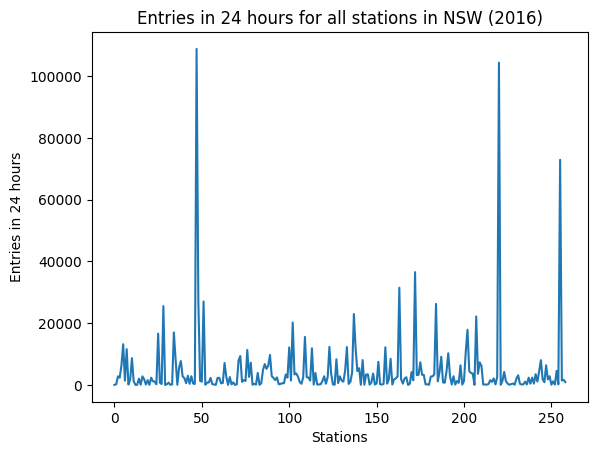

In [147]:
stations16["Entries_24_hours"].plot()
plt.xlabel('Stations')
plt.ylabel('Entries in 24 hours')
plt.title('Entries in 24 hours for all stations in NSW (2016)')

Text(0.5, 1.0, 'Exits in 24 hours for all stations in NSW (2016)')

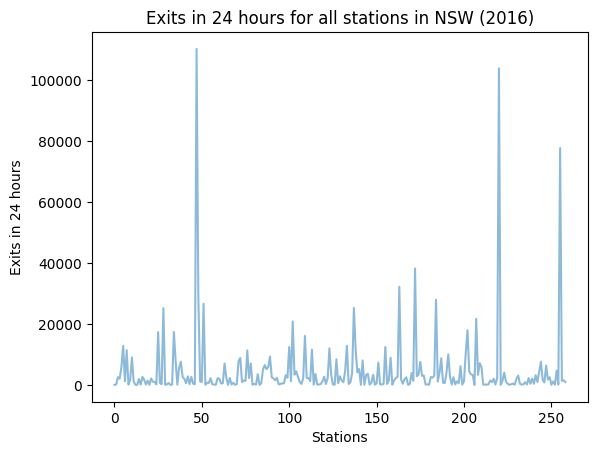

In [148]:
stations16["Exits_24_hours"].plot(alpha=0.5)
plt.xlabel('Stations')
plt.ylabel('Exits in 24 hours')
plt.title('Exits in 24 hours for all stations in NSW (2016)')

Text(0.5, 1.0, 'Entries in 24 hours for all stations in NSW (2017)')

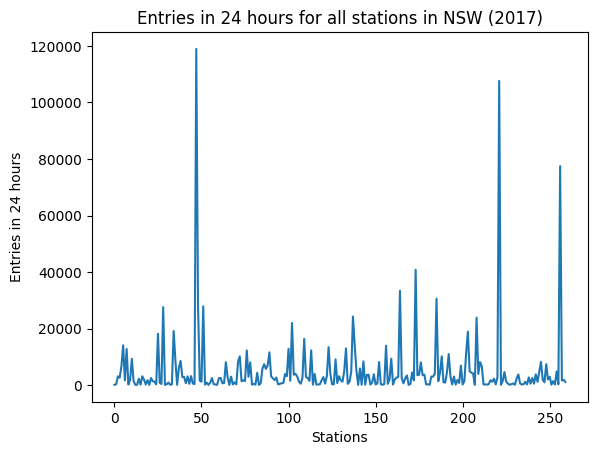

In [152]:
stations17["Entries_24_hours"].plot()
plt.xlabel('Stations')
plt.ylabel('Entries in 24 hours')
plt.title('Entries in 24 hours for all stations in NSW (2017)')

Text(0.5, 1.0, 'Exits in 24 hours for all stations in NSW (2017)')

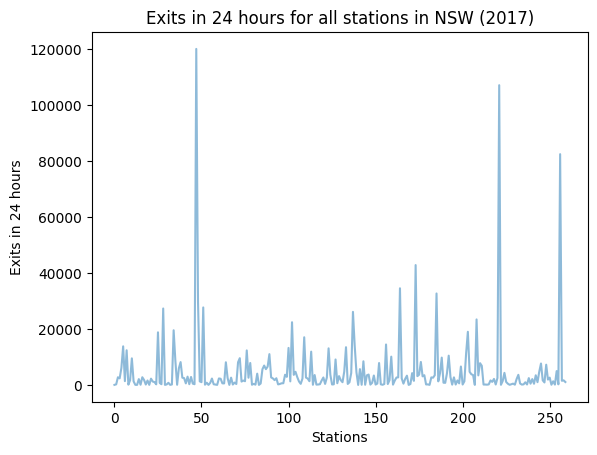

In [150]:
stations17["Exits_24_hours"].plot(alpha=0.5)
plt.xlabel('Stations')
plt.ylabel('Exits in 24 hours')
plt.title('Exits in 24 hours for all stations in NSW (2017)')

Text(0.5, 1.0, 'Entries in 24 hours for all stations in NSW (2018)')

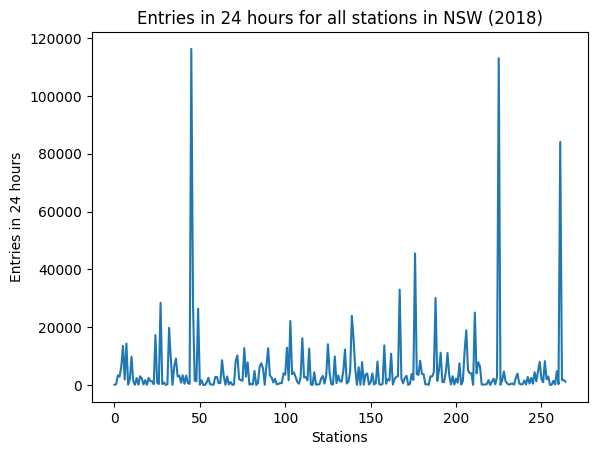

In [157]:
stations18["Entries_24_hours"].plot()
plt.xlabel('Stations')
plt.ylabel('Entries in 24 hours')
plt.title('Entries in 24 hours for all stations in NSW (2018)')

Text(0.5, 1.0, 'Exits in 24 hours for all stations in NSW (2018)')

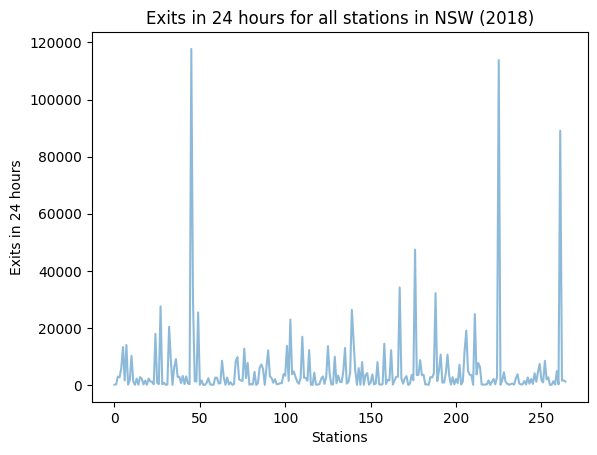

In [155]:
stations18["Exits_24_hours"].plot(alpha=0.5)
plt.xlabel('Stations')
plt.ylabel('Exits in 24 hours')
plt.title('Exits in 24 hours for all stations in NSW (2018)')

Text(0.5, 1.0, 'Entries in 24 hours for all stations in NSW (2019)')

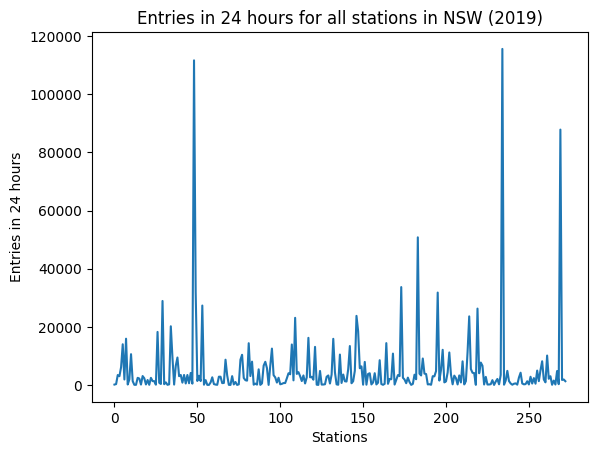

In [158]:
stations["Entries_24_hours"].plot()
plt.xlabel('Stations')
plt.ylabel('Entries in 24 hours')
plt.title('Entries in 24 hours for all stations in NSW (2019)')

Text(0.5, 1.0, 'Exits in 24 hours for all stations in NSW (2019)')

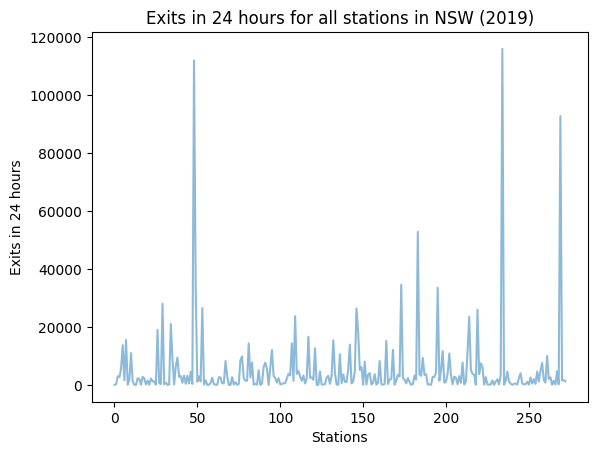

In [160]:
stations["Exits_24_hours"].plot(alpha=0.5)
plt.xlabel('Stations')
plt.ylabel('Exits in 24 hours')
plt.title('Exits in 24 hours for all stations in NSW (2019)')

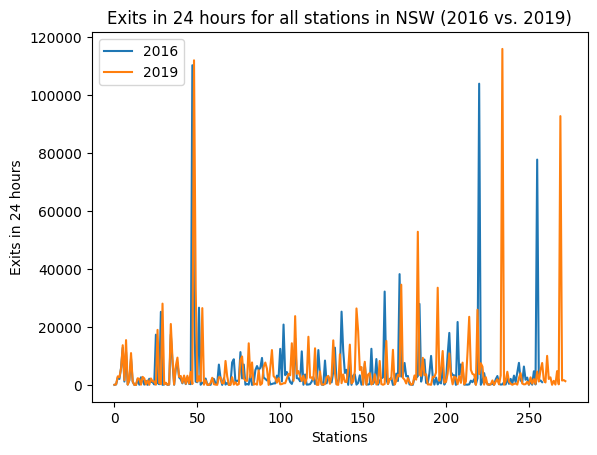

In [173]:
stations16["Exits_24_hours"].plot()
plt.xlabel('Stations')
plt.ylabel('Exits in 24 hours')
stations["Exits_24_hours"].plot()
plt.xlabel('Stations')
plt.ylabel('Exits in 24 hours')
plt.legend(labels=['2016', '2019'])
plt.title('Exits in 24 hours for all stations in NSW (2016 vs. 2019)')
plt.show()

In [210]:
allstations.YEAR.value_counts()

YEAR
2019        273
2018        265
Feb 2020    263
2017        260
2016        259
Sep 2020    252
May 2020    236
Name: count, dtype: int64

<Axes: xlabel='YEAR'>

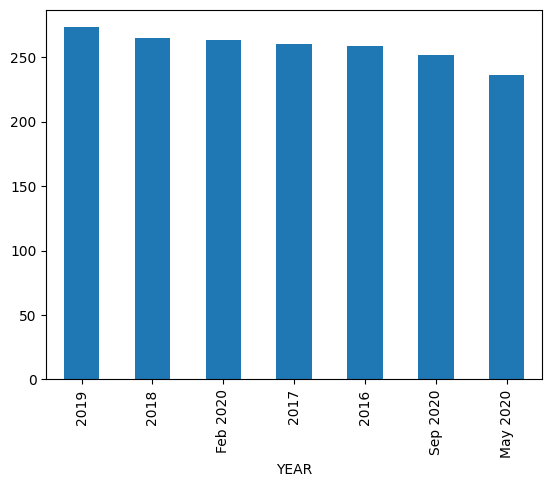

In [213]:
pdvc = allstations.YEAR.value_counts()
pdvc.plot(kind="bar")

In [180]:
stations16 = pd.read_excel("2016.xlsx")
stations19 = pd.read_excel("2019.xlsx")
set1 = set(stations16['STATION'])
set2 = set(stations19['STATION'])
uncommon_entries = set1 - set2
print("Stations in 2016, but not 2019:", uncommon_entries)

Stations in 2016, but not 2019: {'Booragul Station'}


In [194]:
stations16 = pd.read_excel("2016.xlsx")
stations19 = pd.read_excel("2019.xlsx")
set1 = set(stations16['STATION'])
set2 = set(stations19['STATION'])
uncommon_entries = set2 - set1
print("Stations in 2019, but not 2016:", uncommon_entries)

Stations in 2016, but not 2019: {'Cockle Creek Station', 'Coledale Station', 'Goulburn Station', 'Teralba Station', 'Douglas Park Station', 'Kellyville Station', 'Norwest Station', 'Rouse Hill Station', 'Castle Hill Station', 'Newcastle Interchange', 'Kotara Station', 'Bella Vista Station', 'Cherrybrook Station', 'Tallawong Station', 'Hills Showground Station'}


STORY 1: ME IN SYDNEY

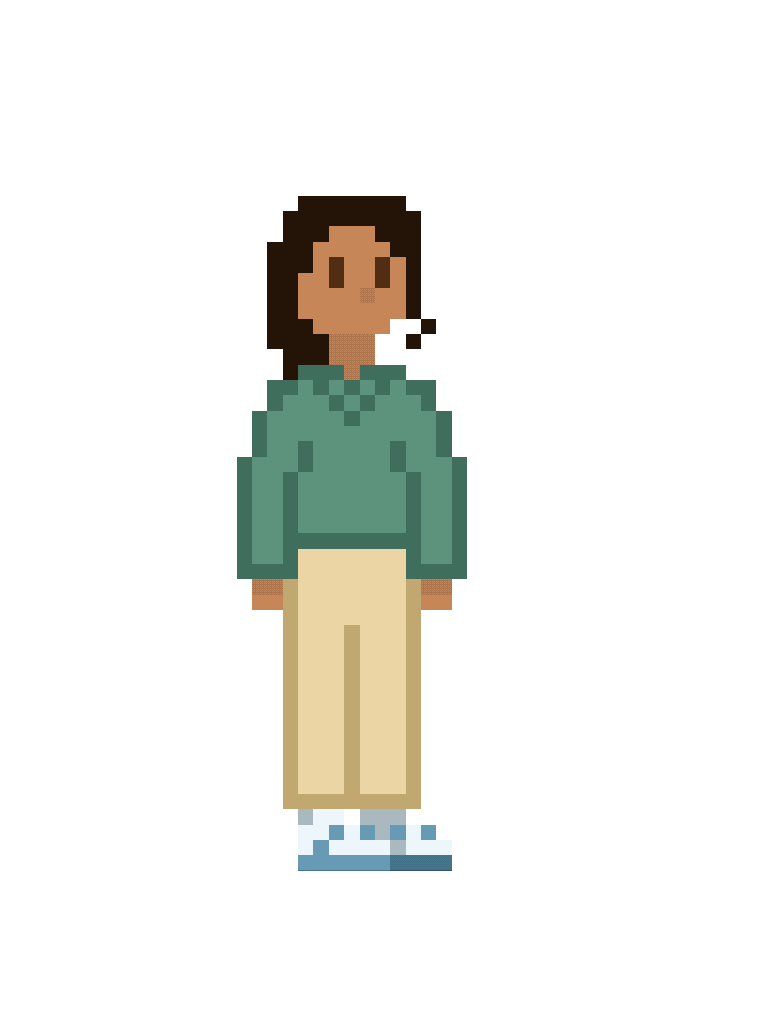

In [205]:
display(Image(filename='IMG_0053.GIF'))

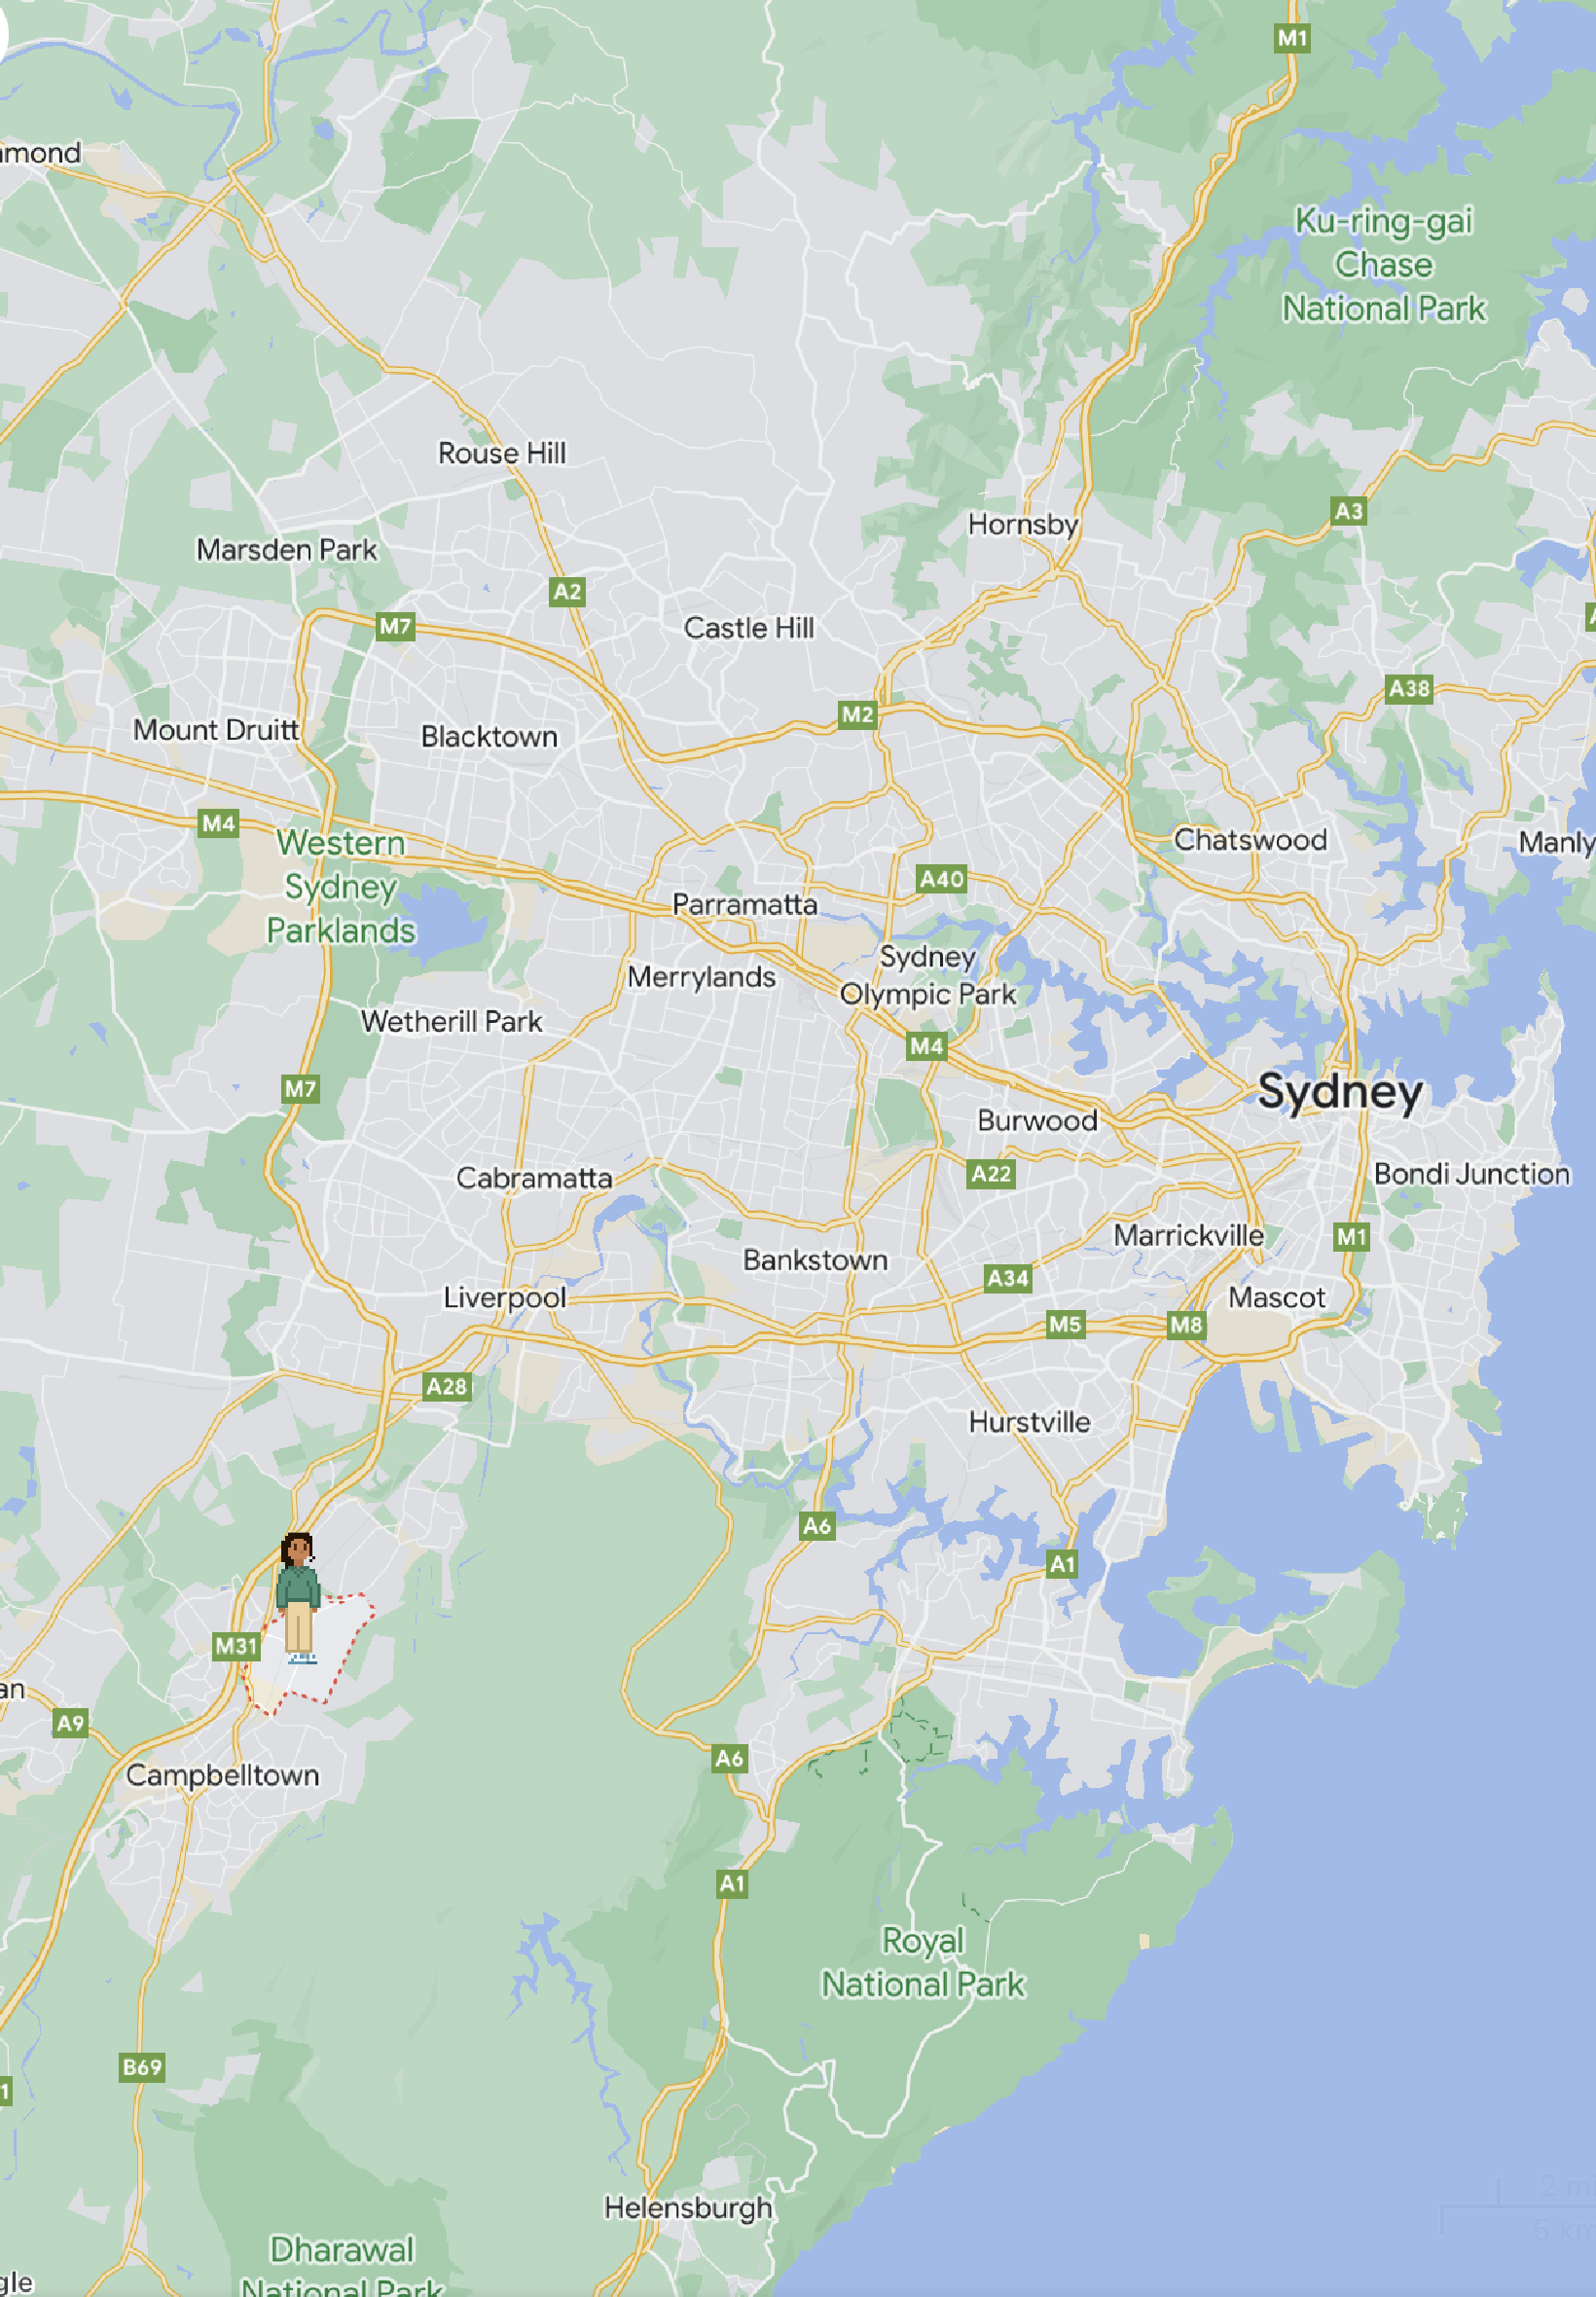

In [206]:
display(Image(filename='IMG_0052.PNG'))

In [229]:
minto9 = allstations.iloc[937]
minto9

YEAR                             2019
STATION                 Minto Station
Entries_06:00-10:00              2200
Exits_06:00-10:00                 350
Entries_10:00-15:00               530
Exits_10:00-15:00                 480
Entries_15:00-19:00               500
Exits_15:00-19:00                2090
Entries_19:00 -06:00              570
Exits_19:00-06:00                 700
Entries_24_hours                 3800
Exits_24_hours                   3620
Name: 937, dtype: object

In [230]:
kogarah = allstations.iloc[905]
kogarah

YEAR                               2019
STATION                 Kogarah Station
Entries_06:00-10:00                4720
Exits_06:00-10:00                  3180
Entries_10:00-15:00                3190
Exits_10:00-15:00                  2290
Entries_15:00-19:00                3750
Exits_15:00-19:00                  4660
Entries_19:00 -06:00               1460
Exits_19:00-06:00                  2540
Entries_24_hours                  13120
Exits_24_hours                    12670
Name: 905, dtype: object

In [141]:
geocoded_stations2 = gp.tools.geocode(stations2.STATION, provider='Nominatim', user_agent="TrainStationLocator-Geocoding")

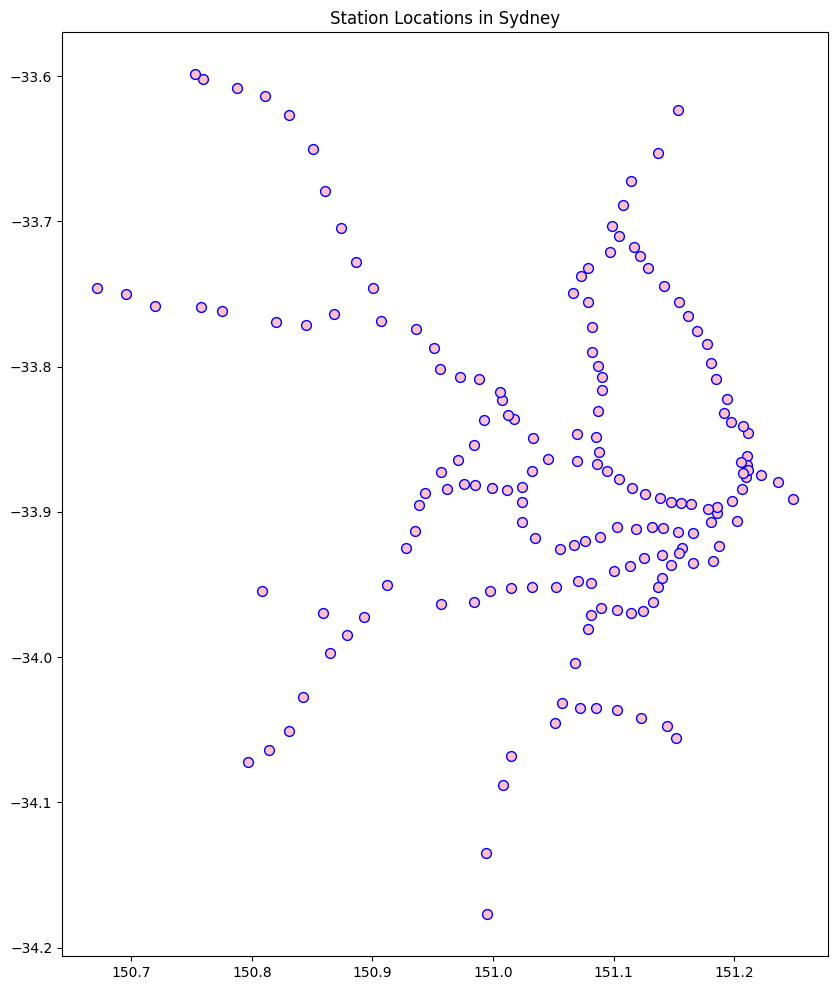

In [187]:
geo_stations2 = gp.GeoDataFrame(geocoded_stations2, geometry='geometry')
fig, ax = plt.subplots(figsize=(12, 12)) 
map_station = geo_stations2.plot(ax=ax, markersize=50, color='pink', marker='o', edgecolor='blue')
plt.title('Station Locations in Sydney')
plt.show()

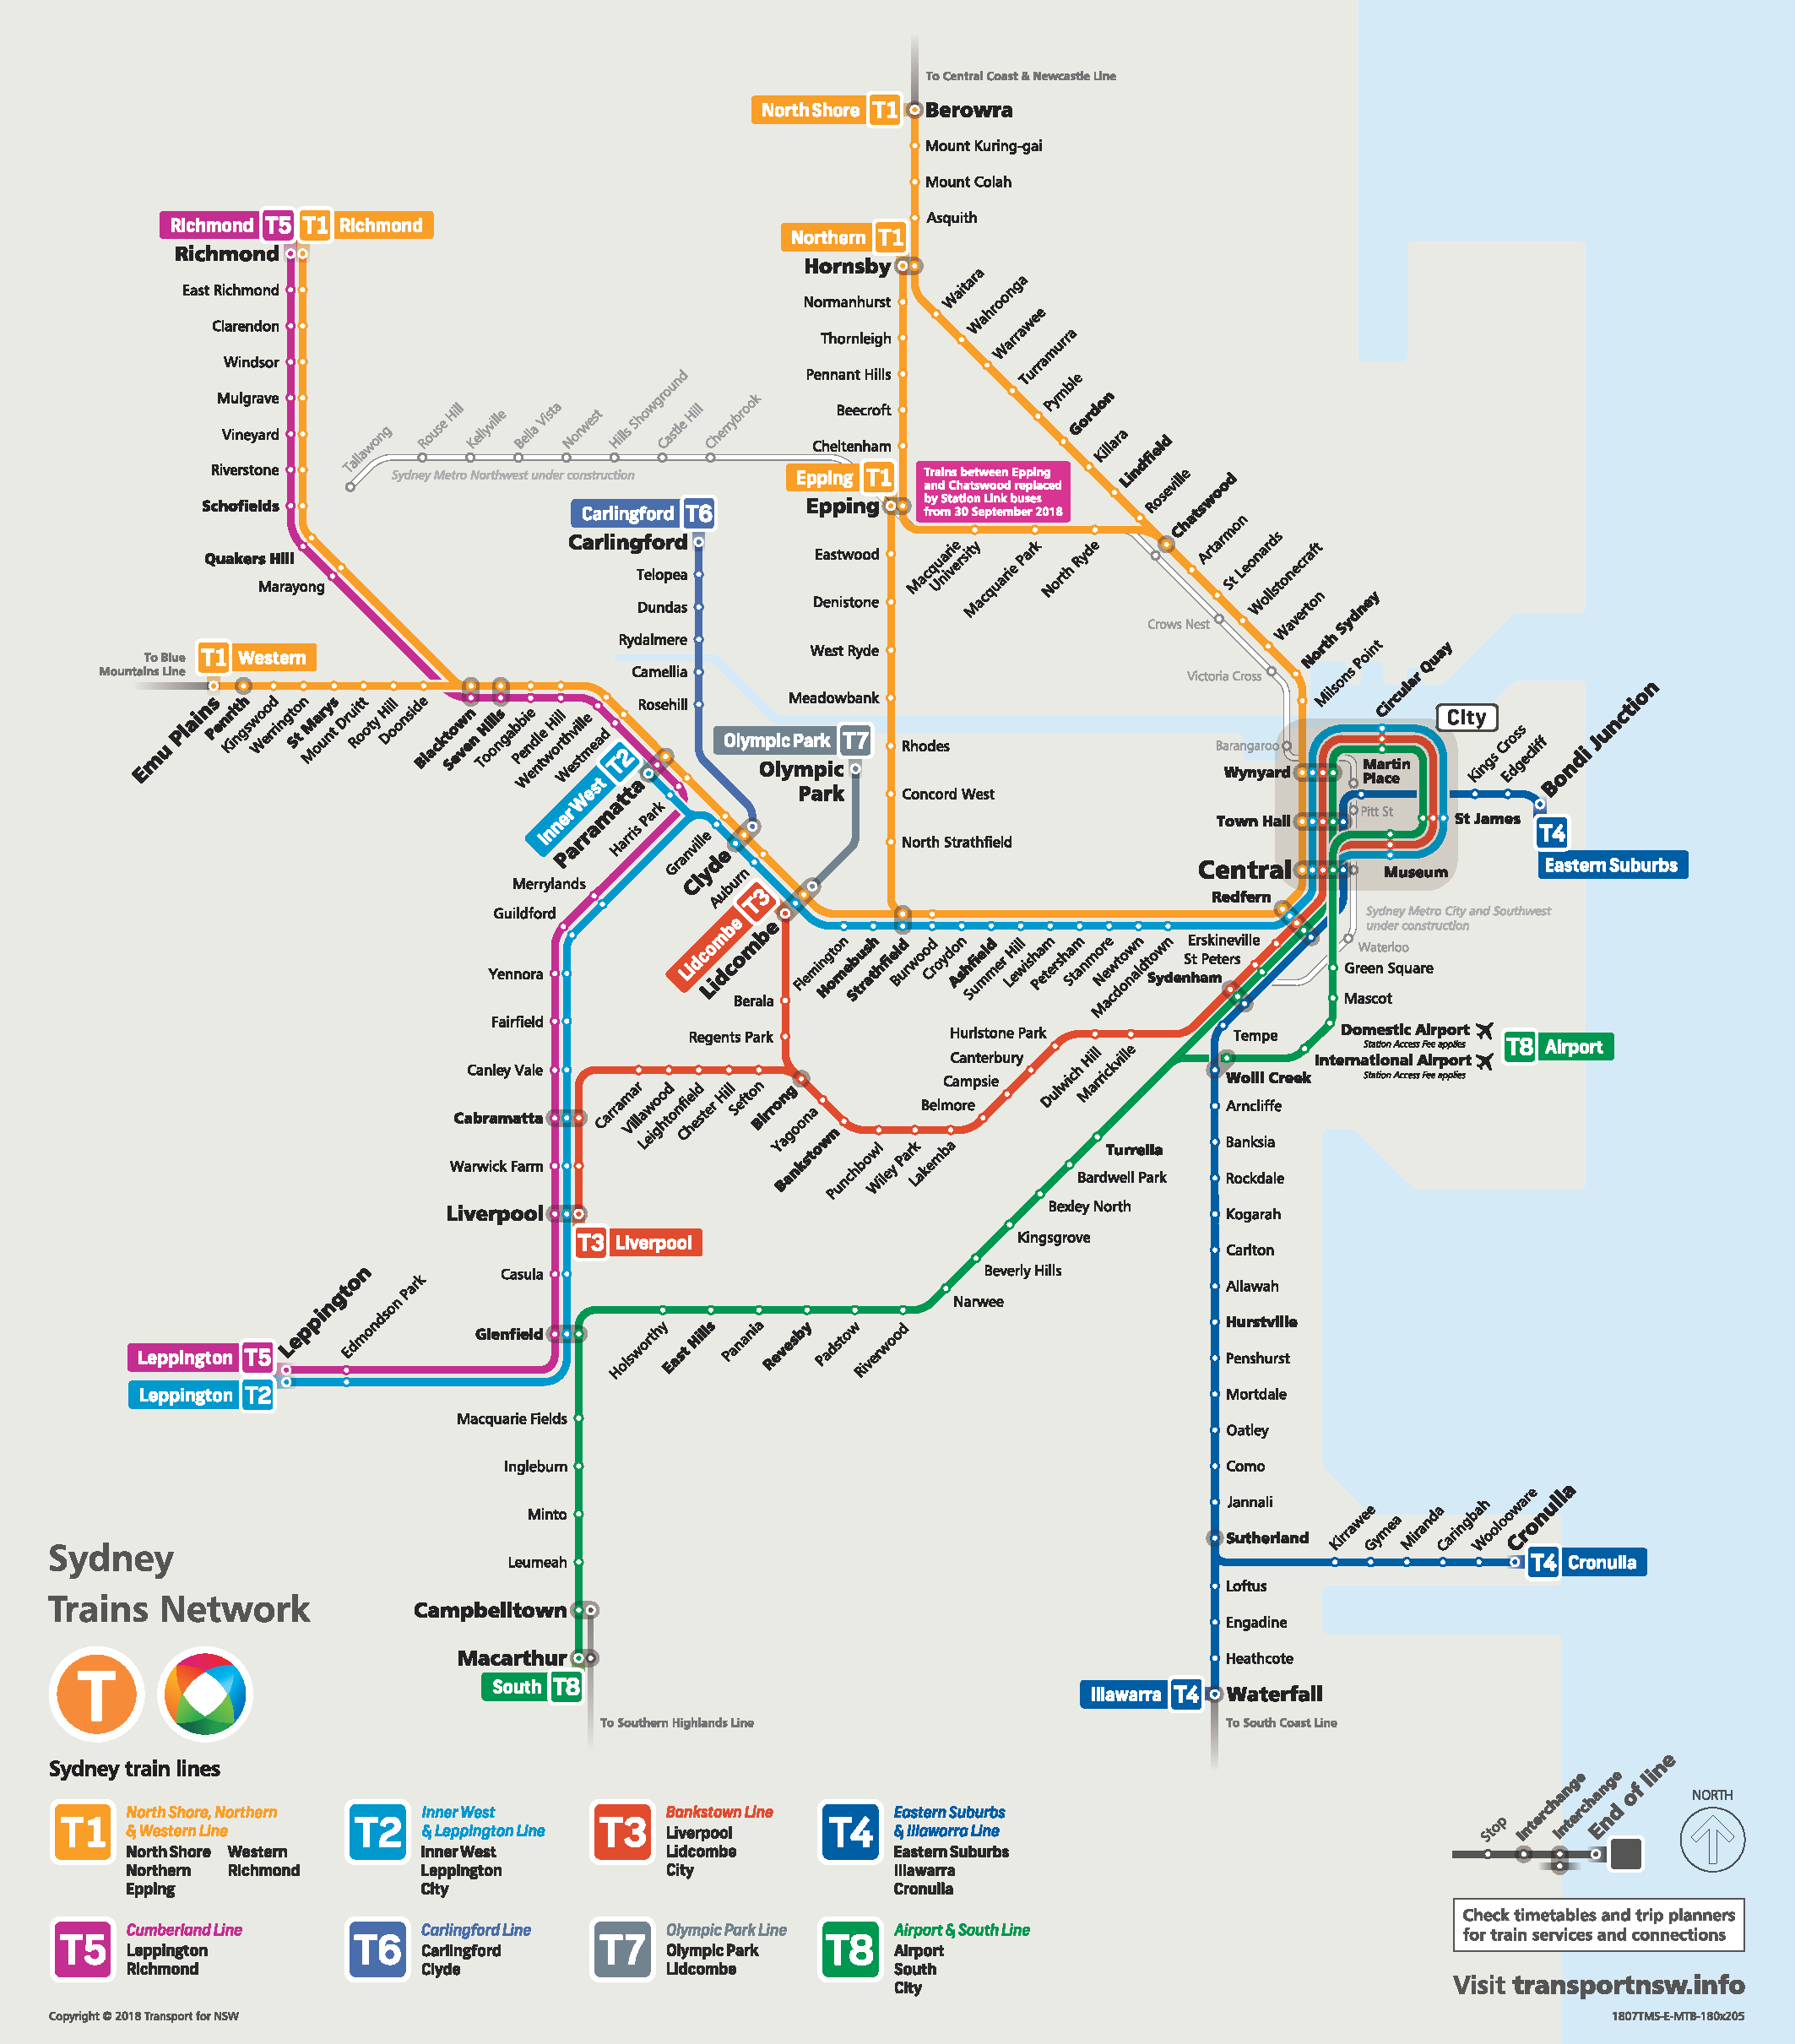

In [204]:
display(Image(filename='Sydney-Trains-Network-Map.png'))

STORY 2: ME IN TIBOOBURRA

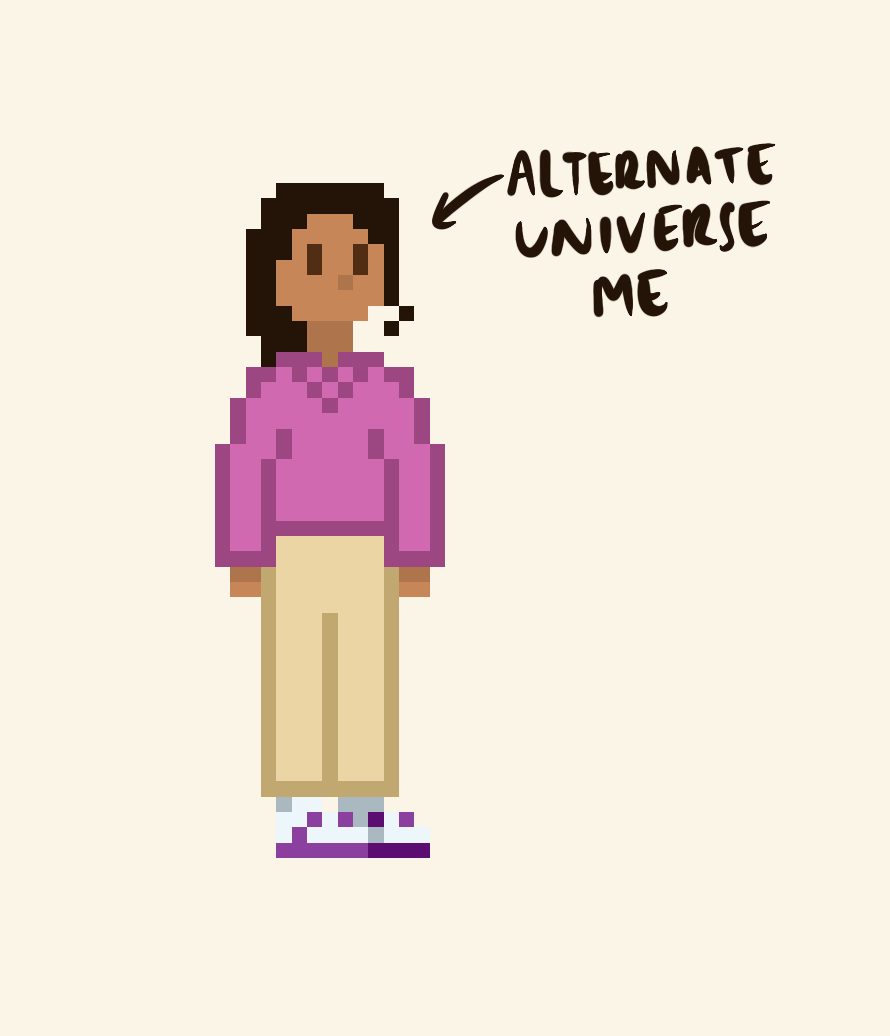

In [207]:
display(Image(filename='IMG_0054.PNG'))

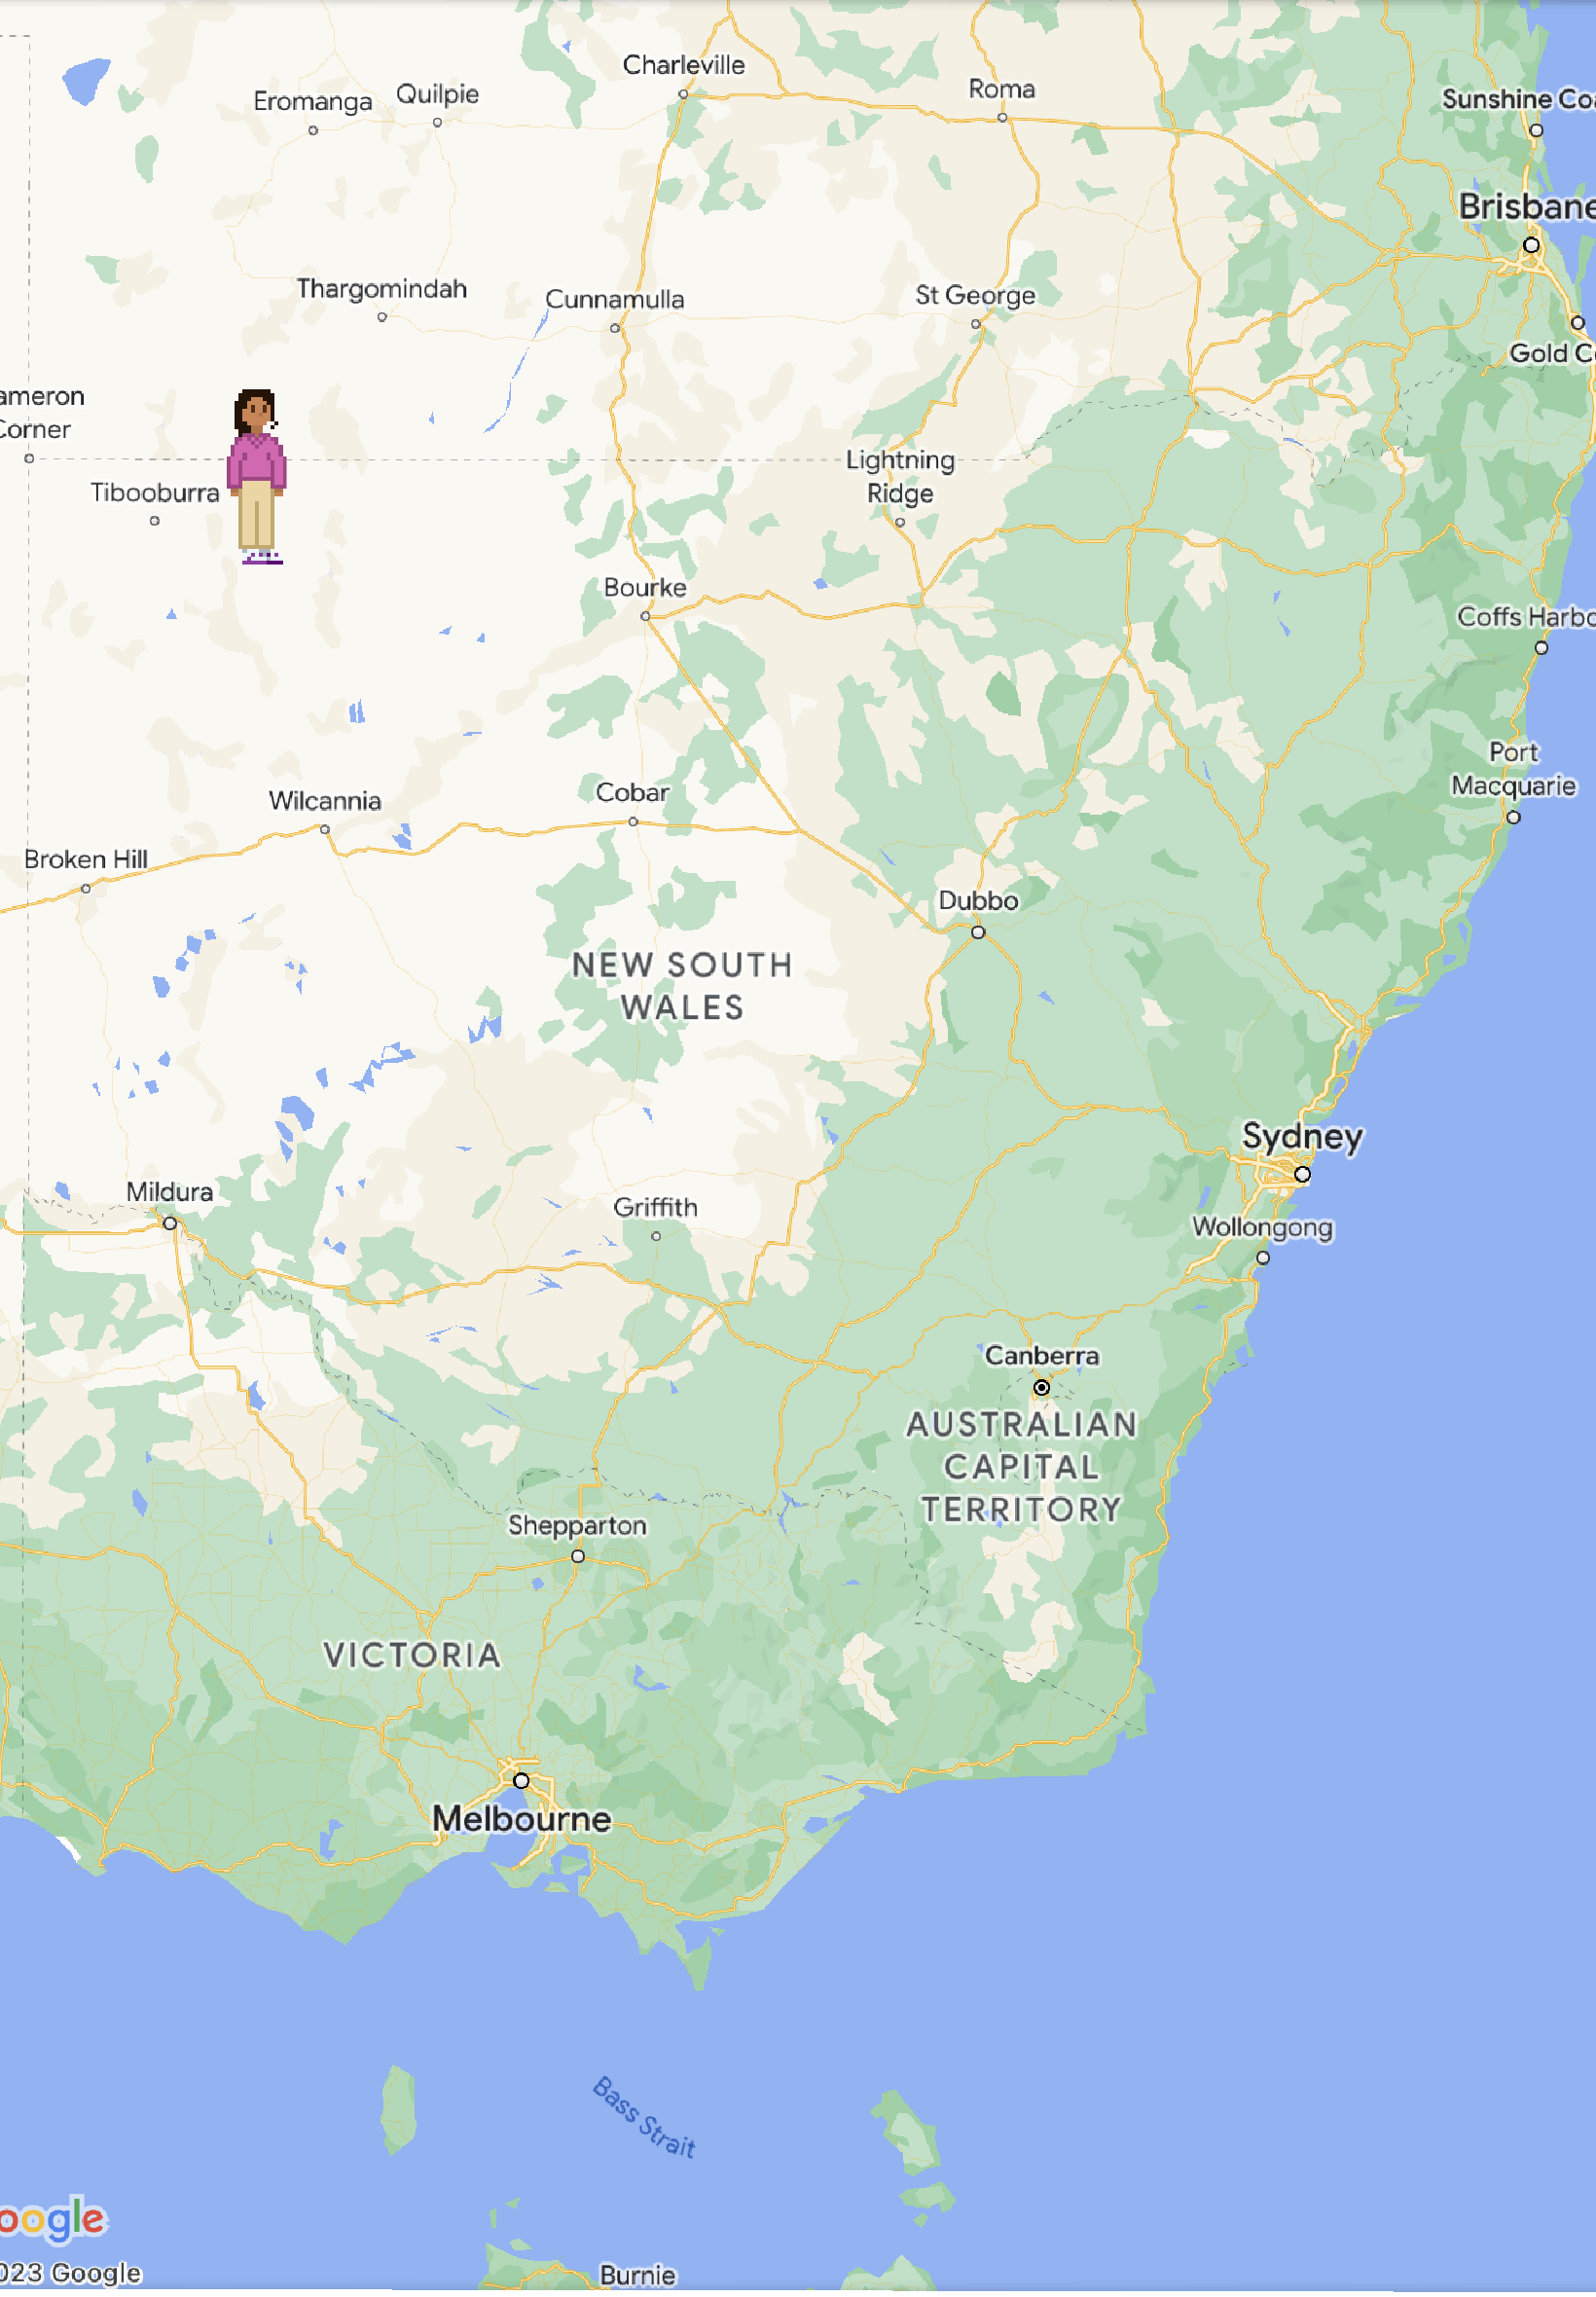

In [208]:
display(Image(filename='IMG_0056.PNG'))

In [137]:
geocoded_stations = gp.tools.geocode(stations.STATION, provider='Nominatim', user_agent="TrainStationLocator-Geocoding")

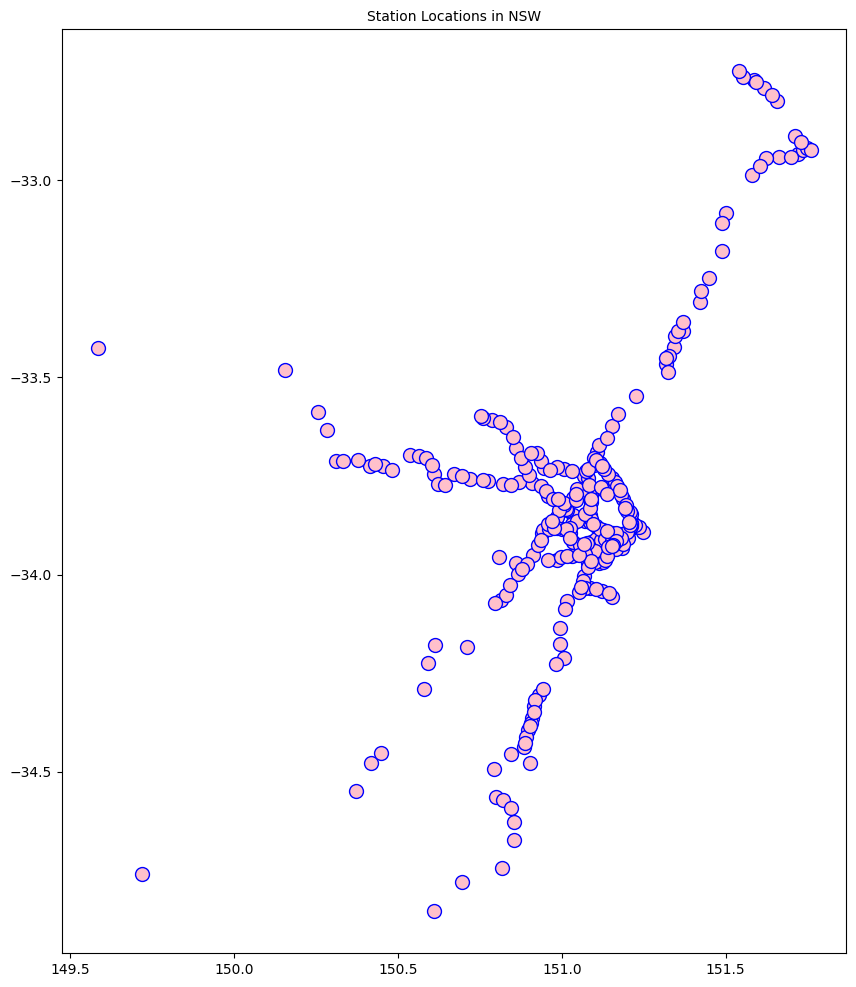

In [195]:
geo_stations = gp.GeoDataFrame(geocoded_stations, geometry='geometry')
fig, ax = plt.subplots(figsize=(12, 12))
map_station = geo_stations.plot(ax=ax, markersize=100, color='pink', marker='o', edgecolor='blue')
plt.title('Station Locations in NSW', size=10)
plt.show()